In [35]:
%pylab inline
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 1, bias=False)

    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        return x

Populating the interactive namespace from numpy and matplotlib


In [36]:
x_train = Variable(torch.rand(10000,2))
_, y_train = torch.max(x_train,1)
x_test = Variable(torch.rand(1000,2))
_, y_test = torch.max(x_test,1)
y_train = y_train.float()
y_test = y_test.float()

In [37]:
net = Net()
loss = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.1)
loss_list = []

In [46]:
for iteration in range(2000):
    optimizer.zero_grad()
    loss_ = loss(net(x_train), y_train.view(len(x_train),1))    
    loss_list.append(loss_.data.numpy())
    loss_.backward()
    optimizer.step()

In [47]:
list(net.parameters())

[Parameter containing:
 -8.2596  8.2479
 [torch.FloatTensor of size 1x2]]

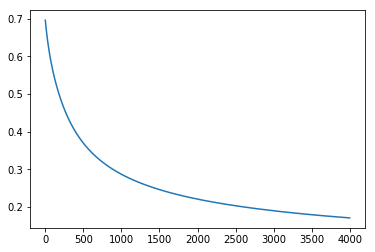

In [48]:
plt.plot(loss_list)

In [53]:
def test_accuracy(model, X, y):
    model.eval()
    correct = 0
    total = len(X)
    for i in range(total):
        y_hat = torch.round(model(X[i])).data[0]
        if int(y_hat) == int(y[i].data[0]):
            correct += 1
    return correct/float(total)


In [54]:
test_accuracy(net, x_train, y_train)

0.9995

In [55]:
test_accuracy(net, x_test, y_test)

1.0